In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Plot s value distributions for different epsilons

def plot_dfe():
    
    #NUM_ACC_CONST = 3000
    OPT_CONST = 8
    prior = 1
    inFile_list = ['/storage/BonnieH/selection_project/per_locus/results/0.0006_3_0.3_yny3_euro_p%d_all_per.txt'%(prior),
                  '/storage/BonnieH/selection_project/per_locus/results/0.005_3_0.3_yny3_euro_p%d_all_per.txt'%(prior)]
    
    svals_list = []
    for inFile in inFile_list:
        results_file = open(inFile, 'r')
        svals = [0, 0, 0, 0]
        header = results_file.readline().strip()
        for line in results_file:
            
            # Get information from line
            info = line.strip().split('\t')
            chrom = info[0]
            start = int(info[1])
            end = int(info[2])
            per = int(info[3])
            optimal_ru = int(info[4])
            coding = float(info[6])
            num_acc = int(info[18])
            ABC_s = float(info[16])

            if ABC_s != -1 and per == 3 and optimal_ru >= OPT_CONST: # and coding == 0.0 and num_acc < NUM_ACC_CONST:
                if ABC_s < 10**-4:
                    svals[0] += 1
                elif ABC_s < 10**-3:
                    svals[1] += 1
                elif ABC_s < 10**-2:
                    svals[2] += 1
                elif ABC_s >= 10**-2:
                    svals[3] += 1
        results_file.close()
        svals_list.append(svals)
    
    plt.figure(figsize=(10,6))
    for i in range(0, len(svals_list)):
        sum_of_list = sum(svals_list[i])
        for j in range(0, len(svals_list[i])):
            svals_list[i][j] = svals_list[i][j]/sum_of_list
    
    x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
    y_pos = np.arange(len(x))
    
    barWidth = 0.2
    r1 = np.arange(len(x))
    r2 = [y + barWidth for y in r1]
    #r3 = [y-barWidth for y in r1]
    #r4 = [y+2*barWidth for y in r1]
    
    # Make the plot
    plt.bar(r1, svals_list[0], color='red', width=barWidth, edgecolor='white', label='eps = (obs_het + 0.0006)/3') 
    plt.bar(r2, svals_list[1], color='blue', width=barWidth, edgecolor='white', label='eps = (obs_het + 0.005)/3') 
    #plt.bar(r3, svals_list[2], color='green', width=barWidth, edgecolor='white', label='het and binned alleles, eps = (obs_het + 0.0006)/3') 
    #plt.bar(r4, svals_list[3], color='purple', width=barWidth, edgecolor='white', label='het and binned alleles, eps = (obs_het + 0.005)/3') 
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    
    plt.xlabel("S value", size=20)
    plt.ylabel("Probability mass", size=20)
    plt.xticks(fontsize=15, rotation=15) # rotation=90
    plt.yticks(fontsize=15)
    plt.title("Distribution of fitness effects for trinucleotides \n Opt allele >= %d, prior %d"%(OPT_CONST, prior), size=20) #: : \n ABC acceptance < 40%Trinucleotides Optimal Ru >= 9
    plt.legend() 
    #plt.savefig("/storage/BonnieH/selection_project/analysis/dfe_figures/dfe_prior_1.pdf",bbox_inches='tight')

In [3]:
def main():
    plot_dfe()

CPU times: user 711 ms, sys: 15.6 ms, total: 727 ms
Wall time: 5.52 s


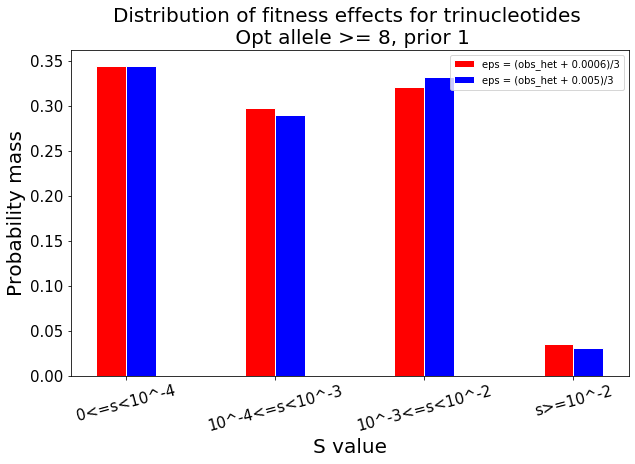

In [4]:
%%time
if __name__ == '__main__':
    main()